In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

In [2]:
# Load Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
df = pd.read_csv(url, sep='\s+', header=None)

In [3]:
# Select features
X = df.iloc[:, :-1]  # Use all except the last column (label)


In [4]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
#Create linkage matrix
linked = linkage(X_scaled, method='ward')

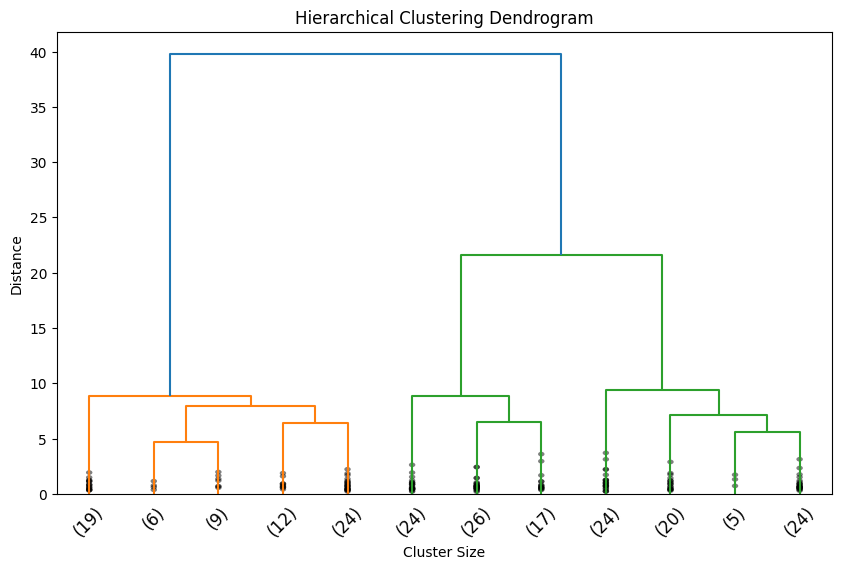

In [6]:
# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [7]:
#  Apply flat clustering (cut tree)
num_clusters = 3
labels = fcluster(linked, num_clusters, criterion='maxclust')

In [8]:
# Evaluate Silhouette Score
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.393


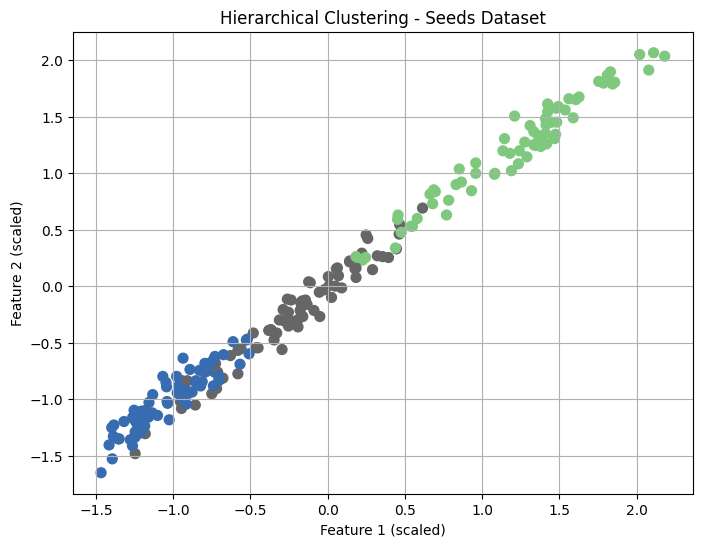

In [9]:
# Visualize final clusters (using first two features)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='Accent', s=50)
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.title("Hierarchical Clustering - Seeds Dataset")
plt.grid(True)
plt.show()